# Derivatives
## Explained with an Example - Vehicle's Longitudinal Speed Control
**Tags:** ```interpolate``` ```np.gradient```

Suppose we have a time series of vehicle speeds. Vehicle's acceleration and jerk can be calculated with respect to time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
# Generate sample data
time = np.linspace(0, 10, 100)
speed_profile = 2 * np.sin(time) + 10 + np.random.normal(0, 1, len(time))

Text(0, 0.5, 'Speed')

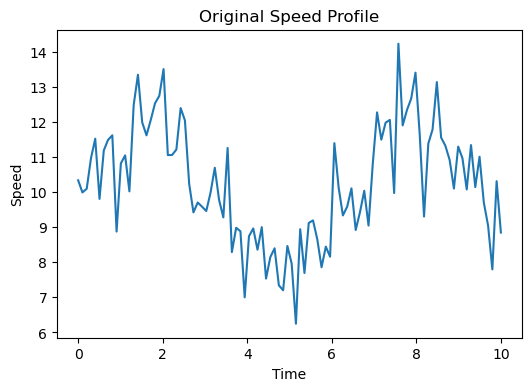

In [5]:
plt.figure(figsize=(6, 4))

plt.subplot(111)
plt.plot(time, speed_profile, label='time - speed')
plt.title('Original Speed Profile')
plt.xlabel('Time')
plt.ylabel('Speed')
#plt.legend()

In [6]:
# Interpolate the speed data to make it smoother
interp_function = interp1d(time, speed_profile, kind='cubic')
smooth_time = np.linspace(0, 10, 1000)
smooth_speed = interp_function(smooth_time)

Text(0, 0.5, 'Speed')

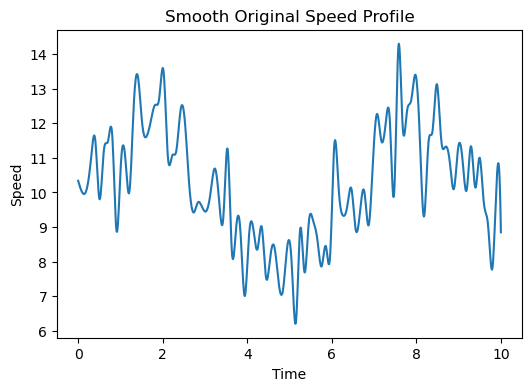

In [7]:
plt.figure(figsize=(6, 4))

plt.subplot(111)
plt.plot(smooth_time, smooth_speed, label='Smooth Speed Profile')
plt.title('Smooth Original Speed Profile')
plt.xlabel('Time')
plt.ylabel('Speed')
#plt.legend()

**np.gradient** can be used to calculate gradient of an array. For one-dimentional array, it computes the **first-order differences** along the specified axis.  
<img src="notebook_imgs/np_gradient_fun.png" alt="Example Image" width="400"/>

In [11]:
# Calculate the first derivative (acceleration)
speed_derivative_1 = np.gradient(smooth_speed, smooth_time)

# Calculate the second derivative (jerk)
speed_derivative_2 = np.gradient(speed_derivative_1, smooth_time)

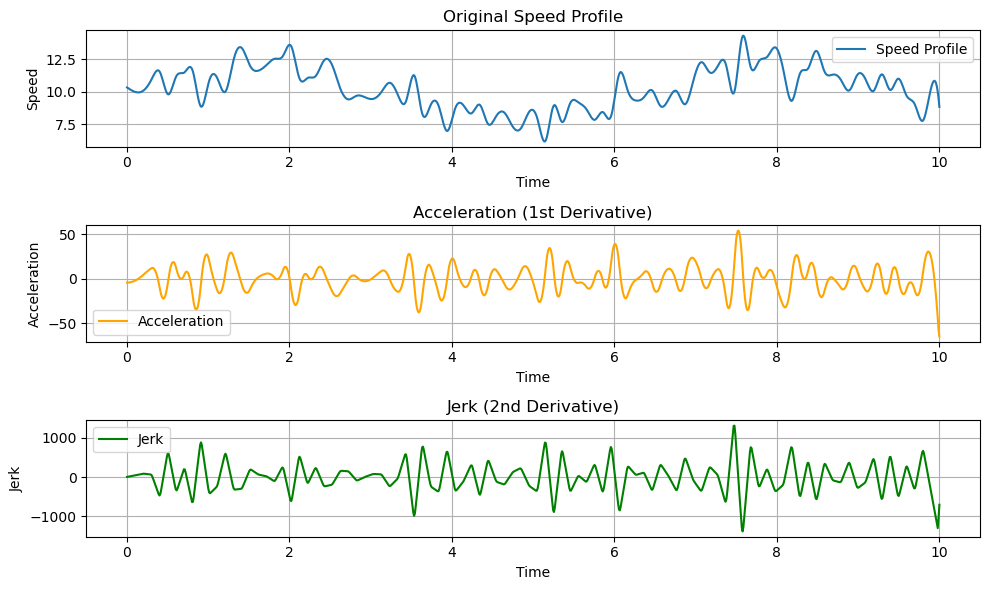

In [12]:
# Plot the original speed profile, acceleration, and jerk
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(smooth_time, smooth_speed, label='Speed Profile')
plt.title('Original Speed Profile')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(smooth_time, speed_derivative_1, color='orange', label='Acceleration')
plt.title('Acceleration (1st Derivative)')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(smooth_time, speed_derivative_2, color='green', label='Jerk')
plt.title('Jerk (2nd Derivative)')
plt.xlabel('Time')
plt.ylabel('Jerk')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()